# RFM Analysis using KMeans

In [37]:
# load packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# load the dataset
df_store = pd.read_csv('superstore.csv')


C:\Users\86185\AppData\Local\Temp\ipykernel_18780\4169065790.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [38]:
# check the info of the dataframe
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [39]:
df_store.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [40]:
# change the order date to datetime 
# 将订单日期改为日期时间
df_store['order_date'] = pd.to_datetime(df_store['order_date'])


C:\Users\86185\AppData\Local\Temp\ipykernel_18780\801853374.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_store['order_date'] = pd.to_datetime(df_store['order_date'])


In [41]:
# only need order_id, order_date, sales, customer_id for the RFM analysis
# RFM 分析只需订单号、订单日期、销售额和客户号
df_rfm = df_store[['order_id', 'order_date', 'sales', 'customer_id']]
df_rfm

,order_id,order_date,sales,customer_id
0,CA-2016-152156,2016-11-08,261.9600,CG-12520
1,CA-2016-152156,2016-11-08,731.9400,CG-12520
2,CA-2016-138688,2016-06-12,14.6200,DV-13045
3,US-2015-108966,2015-10-11,957.5775,SO-20335
4,US-2015-108966,2015-10-11,22.3680,SO-20335
...,...,...,...,...
9989,CA-2014-110422,2014-01-21,25.2480,TB-21400
9990,CA-2017-121258,2017-02-26,91.9600,DB-13060
9991,CA-2017-121258,2017-02-26,258.5760,DB-13060
9992,CA-2017-121258,2017-02-26,29.6000,DB-13060


In [42]:
# Compute recency: the number of days since the most recent purchase, the smaller the more recent#计算最近度：最近一次购买后的天数，越小越近
# compute the maximum date to know the last transaction date for the ENTIRE dataset#计算最长日期以了解整个数据集的最后交易日期
max_date = df_rfm['order_date'].max()
max_date



Timestamp('2017-12-30 00:00:00')

In [43]:

# compute the difference between the most recent order date and each transaction date#计算最近的订单日期和每个交易日期之间的差异
df_rfm['recency'] = max_date - df_rfm['order_date']
df_rfm

C:\Users\86185\AppData\Local\Temp\ipykernel_18780\2025876298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['recency'] = max_date - df_rfm['order_date']


,order_id,order_date,sales,customer_id,recency
0,CA-2016-152156,2016-11-08,261.9600,CG-12520,417 days
1,CA-2016-152156,2016-11-08,731.9400,CG-12520,417 days
2,CA-2016-138688,2016-06-12,14.6200,DV-13045,566 days
3,US-2015-108966,2015-10-11,957.5775,SO-20335,811 days
4,US-2015-108966,2015-10-11,22.3680,SO-20335,811 days
...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,25.2480,TB-21400,1439 days
9990,CA-2017-121258,2017-02-26,91.9600,DB-13060,307 days
9991,CA-2017-121258,2017-02-26,258.5760,DB-13060,307 days
9992,CA-2017-121258,2017-02-26,29.6000,DB-13060,307 days


In [44]:

# compute the minimal order recency to get the recency for each customer#计算最小订单最近度以获得每个客户的最近度
customer_recency = df_rfm.groupby('customer_id')['recency'].min().reset_index()
customer_recency


,customer_id,recency
0,AA-10315,184 days
1,AA-10375,19 days
2,AA-10480,259 days
3,AA-10645,55 days
4,AB-10015,415 days
...,...,...
788,XP-21865,43 days
789,YC-21895,4 days
790,YS-21880,9 days
791,ZC-21910,54 days


In [45]:
# Extract number of days only#仅提取天数
customer_recency['recency'] = customer_recency['recency'].dt.days
customer_recency.head()

,customer_id,recency
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415


In [46]:
# compute Frequency: count total number of order_id# 计算频率：count order_id 的总数
customer_frequency = df_rfm.groupby('customer_id')['order_id'].nunique().reset_index()
customer_frequency.columns = ['customer_id', 'frequency']
customer_frequency

,customer_id,frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
...,...,...
788,XP-21865,11
789,YC-21895,5
790,YS-21880,8
791,ZC-21910,13


In [47]:
# Compute Monetary: compute the total spending per customer# 计算货币：计算每位客户的总支出
df_rfm['sales'] = df_store['quantity'] * df_store['sales']* (1 - df_store['discount'])
customer_monetary = df_rfm.groupby('customer_id')['sales'].sum().reset_index()
customer_monetary.columns = ['customer_id', 'monetary']
customer_monetary

C:\Users\86185\AppData\Local\Temp\ipykernel_18780\2170000373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['sales'] = df_store['quantity'] * df_store['sales']* (1 - df_store['discount'])


,customer_id,monetary
0,AA-10315,13127.81920
1,AA-10375,2583.99800
2,AA-10480,5484.60480
3,AA-10645,20435.19565
4,AB-10015,1969.68800
...,...,...
788,XP-21865,7938.71160
789,YC-21895,26323.57080
790,YS-21880,40920.86560
791,ZC-21910,33364.85990


In [48]:
# Merge tha dataframes to get the final RFM dataframe# 合并数据帧，得到最终的 RFM 数据帧
# 合并Recency、Frequency和Monetary数据框
rfm_data = pd.merge(customer_recency, customer_frequency, on='customer_id')
rfm_data = pd.merge(rfm_data, customer_monetary, on='customer_id')
rfm_data.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm_data

,customer_id,recency,frequency,monetary
0,AA-10315,184,5,13127.81920
1,AA-10375,19,9,2583.99800
2,AA-10480,259,4,5484.60480
3,AA-10645,55,6,20435.19565
4,AB-10015,415,3,1969.68800
...,...,...,...,...
788,XP-21865,43,11,7938.71160
789,YC-21895,4,5,26323.57080
790,YS-21880,9,8,40920.86560
791,ZC-21910,54,13,33364.85990


In [49]:
# scale the rfm using StandardScaler# 使用 StandardScaler 对 rfm 进行缩放
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_data[['recency', 'frequency', 'monetary']])


# convert scaling result to a dataframe with proper column names# 将缩放结果转换为具有适当列名的数据帧

scaled_rfm_data = pd.DataFrame(scaled_data)
scaled_rfm_data.columns = ['recency_z', 'frequency_z', 'monetary_z']

# combine scaled columns with the dataframe# 将缩放后的列与数据帧合并

rfm_data = pd.concat([rfm_data, scaled_rfm_data], axis=1)
rfm_data.head()

,customer_id,recency,frequency,monetary,recency_z,frequency_z,monetary_z
0,AA-10315,184,5,13127.81920,0.199889,-0.516429,0.048608
1,AA-10375,19,9,2583.99800,-0.686762,1.052644,-0.738761
2,AA-10480,259,4,5484.60480,0.602912,-0.908697,-0.522156
3,AA-10645,55,6,20435.19565,-0.493311,-0.124161,0.594292
4,AB-10015,415,3,1969.68800,1.441199,-1.300965,-0.784635


<AxesSubplot: >

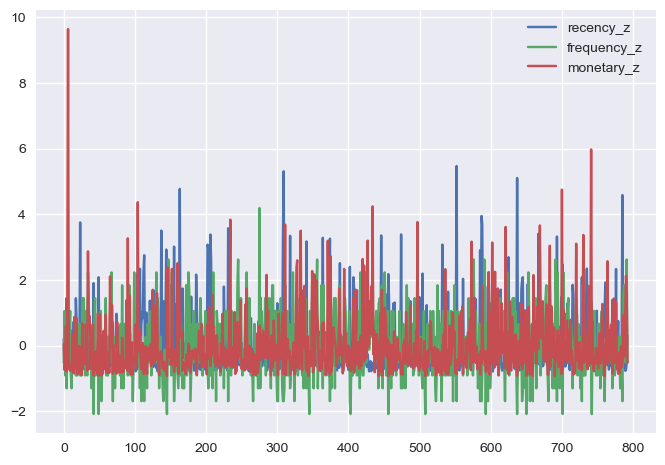

In [50]:
# plot the z-scores to spot outliers
rfm_data[['recency_z', 'frequency_z', 'monetary_z']].plot()

![rfm_z](https://user-images.githubusercontent.com/595772/168314576-c32e79b3-4cb3-432e-8d48-6147c38c5ec2.png)

<AxesSubplot: >

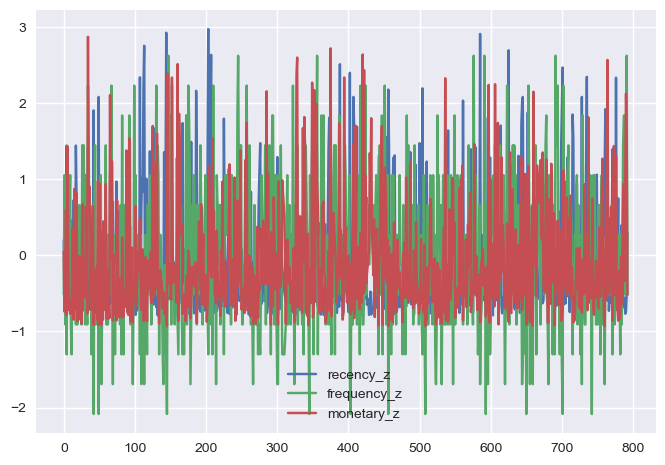

In [51]:
# remove outliers with z-score > 3 or < -3
rfm_data= rfm_data[(np.abs(rfm_data.recency_z)<3) & (np.abs(rfm_data.frequency_z)<3) & (np.abs(rfm_data.monetary_z)<3)]
# plot z-score again to double check
rfm_data[['recency_z', 'frequency_z', 'monetary_z']].plot()

![rfm_z_filtered](https://user-images.githubusercontent.com/595772/168314673-42650e33-7943-4307-8941-8b352d126078.png)

c:\Users\86185\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\86185\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\86185\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\86185\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Inertia')

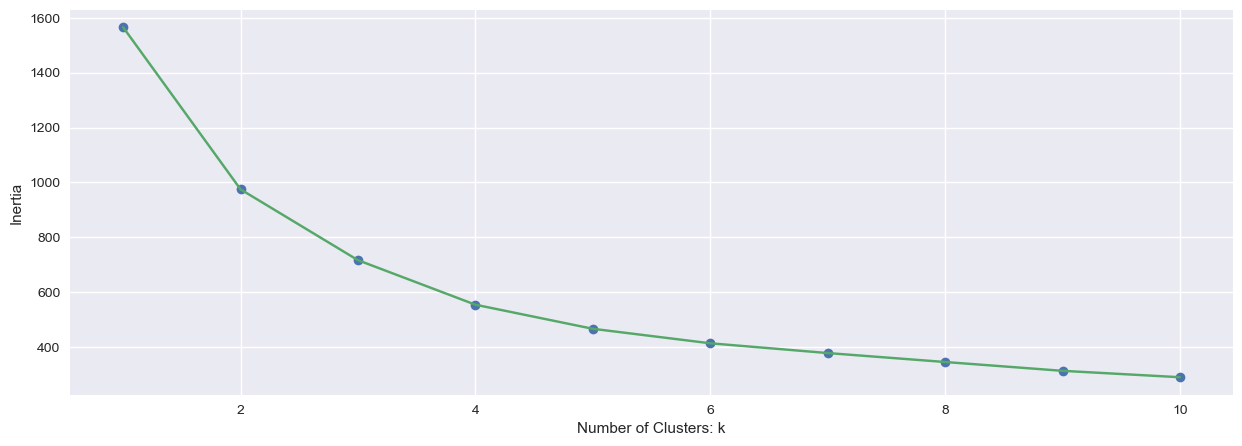

In [52]:
# clustering using the scaled features and plot the inertia to help choose the best k
from sklearn.cluster import KMeans
inertia_scores = []
# try 10 different k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data[['recency_z', 'frequency_z', 'monetary_z']])  # only used z-scores to train
    inertia_scores.append(kmeans.inertia_) # record the inertia for each k
# plot the inertia
fig, ax = plt.subplots(figsize=(15, 5))
k = np.arange(1, 11) 
ax.plot(k, inertia_scores, 'o')
ax.plot(k, inertia_scores, '-')
ax.set_xlabel('Number of Clusters: k')
ax.set_ylabel('Inertia')


![inertia](https://user-images.githubusercontent.com/595772/168314802-7de99179-124a-4f4d-8efe-00a4d04ca8fe.png)

In [53]:
# choose the best k to run k-means again

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_data[['recency_z', 'frequency_z', 'monetary_z']])
# labels indicates which cluster a data instance belongs to
labels = kmeans.labels_
rfm_data['cluster'] = labels  # create a new column to indicate cluster label
centroids = kmeans.cluster_centers_

rfm_data.head()

c:\Users\86185\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\86185\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,customer_id,recency,frequency,monetary,recency_z,frequency_z,monetary_z,cluster
0,AA-10315,184,5,13127.81920,0.199889,-0.516429,0.048608,3
1,AA-10375,19,9,2583.99800,-0.686762,1.052644,-0.738761,0
2,AA-10480,259,4,5484.60480,0.602912,-0.908697,-0.522156,1
3,AA-10645,55,6,20435.19565,-0.493311,-0.124161,0.594292,2
4,AB-10015,415,3,1969.68800,1.441199,-1.300965,-0.784635,1


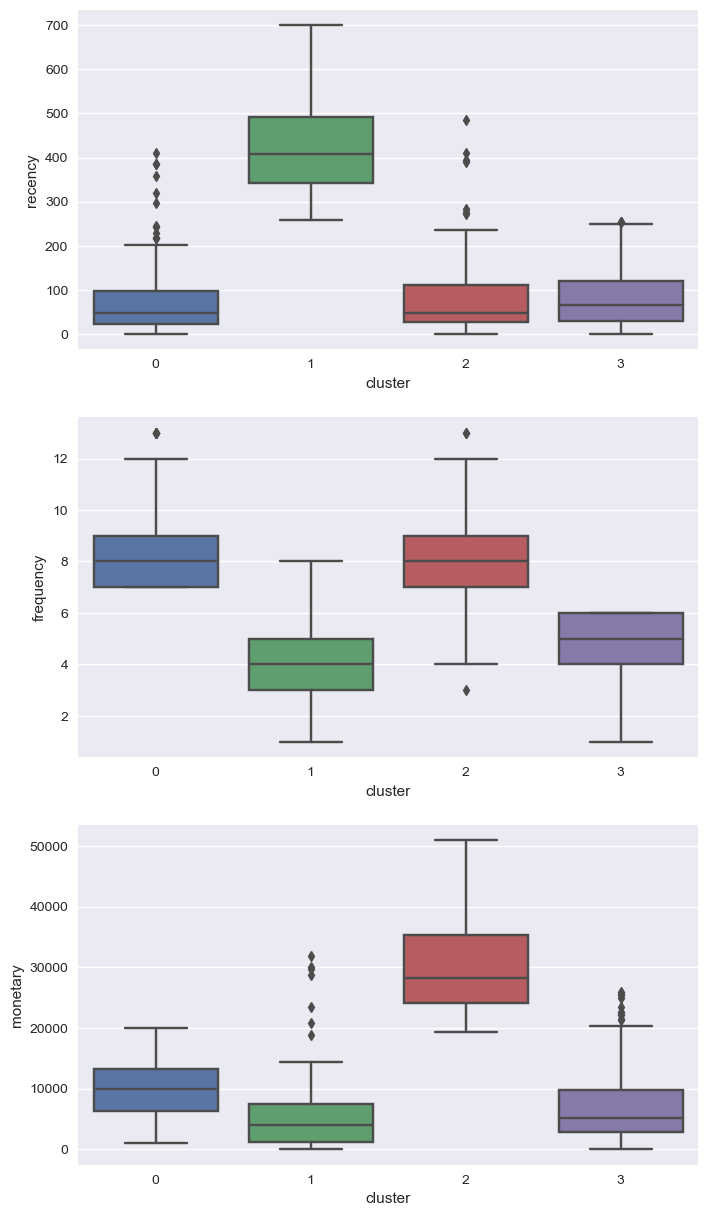

In [54]:
# plot boxplots for different clusters for further analysis# 绘制不同聚类的箱形图，以便进一步分析
fig, ax = plt.subplots(3, 1, figsize=(8,15))

features = ['recency', 'frequency', 'monetary']
for i, val in enumerate(features): 
    sns.boxplot(x='cluster', y=val, data=rfm_data, ax=ax[i])

Question: according to the boxplots, explain each cluster and come up with marketing/operation strategies for each cluster if any

Answer:

cluster0: recency is close and frequency is high and  monetary is low. We can provide personalized product or service recommendations to them

cluster1:recency far away , low frequency, and low monetary.We need to proactively stay in touch with him.

cluster2:recency is close, high frequency, and monetary is high.VIP customers. Therefore, targeted discounts should be provided

cluster3:recency is close, moderate frequency, and low monetary.  Improving product quality to provide him with a better shopping experience